# 1 - Linear Regression - a curve fitting example
## 1.1 - Data generation

- This is the "true" model for the curve: 
\begin{equation}
 y = ax^2 + bx +c
\end{equation}

In [1]:
import random

# get ground-truth data from the underlying model 
n = 100
x = [(idx-round(n/2))/(n/2) for idx in range(n)]
print(x)

a = 3
b = 2
c = 1
y = [xsample**2*a + xsample*b + c for xsample in x]
print(y)

# adding noise
StD = 0.2
y_observed = [y[idx]+random.gauss(0,StD) for idx in range(n)]

[-1.0, -0.98, -0.96, -0.94, -0.92, -0.9, -0.88, -0.86, -0.84, -0.82, -0.8, -0.78, -0.76, -0.74, -0.72, -0.7, -0.68, -0.66, -0.64, -0.62, -0.6, -0.58, -0.56, -0.54, -0.52, -0.5, -0.48, -0.46, -0.44, -0.42, -0.4, -0.38, -0.36, -0.34, -0.32, -0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18, -0.16, -0.14, -0.12, -0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98]
[2.0, 1.9211999999999998, 1.8448000000000002, 1.7708, 1.6992, 1.6300000000000001, 1.5632, 1.4988, 1.4367999999999996, 1.3772, 1.3200000000000003, 1.2652, 1.2128, 1.1627999999999998, 1.1152, 1.0699999999999998, 1.0272000000000001, 0.9868000000000001, 0.9488000000000001, 0.9132, 0.8800000000000001, 0.8492, 0.8208, 0.7948, 0.7712000000000001, 0.75, 0.7312000000000001, 0

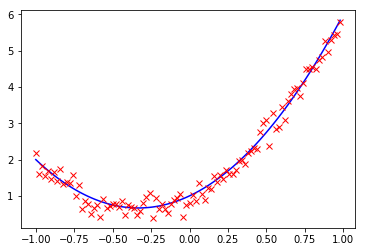

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the curve and the noise-corrupted data
plt.plot(x,y,'b')
plt.plot(x,y_observed,'gx')

In [3]:
## 1.2 - Model Fitting
# 
